In [1]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import csv
import pandas as pd
        
datos = pd.read_csv('dataset.csv')
datos.head()

,filename,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
Blues,blues.00049.wav,0.277484,0.088607,1318.656822,1904.761177,3046.681577,0.039973,-255.965774,110.823046,21.505215,...,-2.442929,-7.130865,-11.163917,-12.609408,2.742009,-8.948849,-7.940728,-2.344157,-0.705606,Blues
Blues,blues.00045.wav,0.429511,0.148366,1739.019621,2290.401739,4551.155813,0.048052,-163.211141,89.791041,12.979256,...,6.008639,-2.910059,-0.434613,-17.545474,4.154533,-5.990226,-7.860423,-8.565096,1.857711,Blues
Blues,blues.00040.wav,0.397725,0.134892,2272.495079,2356.855937,5108.319111,0.097657,-110.260079,90.701812,-2.527487,...,5.952405,-8.033586,4.239868,-16.485552,6.542503,-5.695943,-3.640864,-4.856884,1.854516,Blues
Blues,blues.00010.wav,0.303954,0.142939,1410.469096,1512.620983,2767.274933,0.062981,-173.707514,137.156400,-23.766517,...,1.800535,-2.988374,-1.869389,-0.800155,-3.023782,-0.445196,-1.998228,-0.743599,-4.986112,Blues
Blues,blues.00097.wav,0.375158,0.198282,1236.574280,1602.309124,2604.150920,0.044626,-148.639173,145.746311,-9.363639,...,3.230693,-0.667060,-0.727791,-6.821160,-3.942547,-15.739370,-5.604688,-5.802770,-0.048729,Blues


In [2]:
datos = datos.drop(['filename'],axis=1)

In [3]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Etiquetar
lista = datos.iloc[:, -1]
encoder = LabelEncoder()
y = encoder.fit_transform(lista)

# Extraer los datos y escalar las caracteristicas

In [4]:
scaler = StandardScaler()
x = scaler.fit_transform(np.array(datos.iloc[:, :-1], dtype = float))

In [5]:
x.shape

(1000, 26)

In [6]:
y.shape

(1000,)

# Principal Component Analysis

In [7]:
# Matriz de covarianza

from numpy.core.numeric import dot,newaxis
def covarianza(matriz):
        matriz = np.array(matriz, dtype=float)
        tup = (slice(None),newaxis)
        matriz -= matriz.mean(axis=1)[tup]
        return (dot(matriz, matriz.T) /float((matriz.shape[1])-1))

In [8]:
c = covarianza(x.T)

In [9]:
# Eigenvalores y Eigenvectores
eigen_vals, eigen_vecs = np.linalg.eig(c)

In [10]:
print('\nEigenvalues {}'.format(eigen_vals))


Eigenvalues [8.39402206e+00 6.65038439e+00 2.70556857e+00 1.55716043e+00
 9.44893754e-01 8.95647175e-01 7.36347893e-01 5.41865773e-01
 4.57619380e-01 3.91700724e-01 2.90470291e-03 1.00438870e-02
 3.61821162e-02 7.67154961e-02 3.43939837e-01 3.23178683e-01
 1.10046746e-01 2.78625923e-01 1.35083154e-01 1.57169701e-01
 1.72213670e-01 1.87024278e-01 2.44251177e-01 2.40681068e-01
 2.10801151e-01 2.21954289e-01]


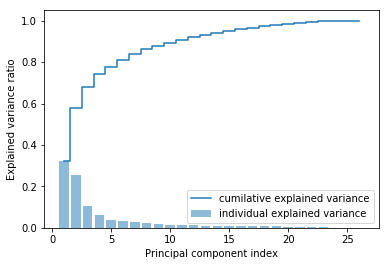

In [11]:
# Visualizar cuantas caracteristicas si son importantes
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

plt.bar(range(1, 27), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1, 27), cum_var_exp, where='mid', label='cumilative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.show()

In [12]:
# Ordenar los eigenvalores

# Make a list of (eigenvalue, eigenvector) tuples
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))]

# sort the (eigenvalue, eigenvector) tuples from high to low
eigen_pairs.sort(key=lambda k: k[0], reverse=True)
eigen_pairs

[(8.394022064175704,
  array([ 0.15750582,  0.05561711,  0.0574533 , -0.0150956 ,  0.04592882,
          0.11974928,  0.13925357, -0.0502278 , -0.18185693,  0.23881511,
         -0.24722585,  0.27593969, -0.24765181,  0.29397243, -0.2242241 ,
          0.28413817, -0.22236792,  0.28003053, -0.24631895,  0.22855912,
         -0.22708602,  0.20040562, -0.1890193 ,  0.15377912, -0.15246124,
          0.09459368])),
 (6.650384387542687,
  array([-0.25704173, -0.24291229, -0.35592343, -0.35623335, -0.36023094,
         -0.27204858, -0.27349239,  0.35069671, -0.13047871,  0.07739774,
         -0.1182116 ,  0.00944076, -0.17618804, -0.03518951, -0.20296479,
         -0.06347919, -0.15938378, -0.06115316, -0.11547657, -0.07825034,
         -0.09739517, -0.0707386 , -0.08848425, -0.09888595, -0.0860358 ,
         -0.13073916])),
 (2.7055685664273446,
  array([-0.00397679,  0.10445276,  0.1480352 ,  0.14928239,  0.14742989,
          0.12951866,  0.18198664, -0.10893381,  0.05311177, -0.07850576

In [13]:
#Matriz de 26 x 6 de los primeros 6 eigenvectores
matriz_w = np.hstack((eigen_pairs[0][1][:, np.newaxis], eigen_pairs[1][1][:, np.newaxis]))

for i in range(2,6):
    matriz_w = np.hstack((matriz_w, eigen_pairs[i][1][:, np.newaxis]))

In [14]:
matriz_w

array([[ 1.57505822e-01, -2.57041725e-01, -3.97679240e-03,
         2.13924590e-01,  1.59668222e-01, -1.29741689e-02],
       [ 5.56171110e-02, -2.42912292e-01,  1.04452757e-01,
         1.69251396e-01,  3.63316398e-01, -4.81251494e-01],
       [ 5.74533014e-02, -3.55923430e-01,  1.48035198e-01,
        -1.57543183e-01, -5.48300712e-02,  1.38331082e-01],
       [-1.50955966e-02, -3.56233346e-01,  1.49282388e-01,
        -3.93956816e-03, -2.37964813e-01,  2.26902453e-02],
       [ 4.59288151e-02, -3.60230943e-01,  1.47429892e-01,
        -9.39075395e-02, -1.39005841e-01,  7.60146700e-02],
       [ 1.19749283e-01, -2.72048578e-01,  1.29518657e-01,
        -3.29788941e-01,  1.27770239e-01,  2.56223871e-01],
       [ 1.39253569e-01, -2.73492388e-01,  1.81986641e-01,
         1.77095169e-02,  3.59036686e-01, -2.45545455e-01],
       [-5.02278025e-02,  3.50696709e-01, -1.08933810e-01,
         3.04832751e-02,  1.46174355e-01, -1.74130940e-01],
       [-1.81856932e-01, -1.30478707e-01,  5.311

In [15]:
matriz_w.shape

(26, 6)

In [16]:
# Convertir de 1000 x 26 a 1000 * 6
x_transformado = x.dot(matriz_w)
x_transformado

array([[-0.07595433,  3.44713347,  1.78783014,  1.87526523, -2.15557597,
        -1.49797127],
       [ 2.50764073,  1.31811374,  1.60820652,  2.98919535, -1.6004027 ,
        -0.90720853],
       [ 4.04184795,  0.74656738,  1.02655678,  0.82345323, -1.31246192,
        -0.69504844],
       ...,
       [ 3.27952521,  0.26366683, -0.48103871,  0.6777984 ,  0.04750238,
         0.21477341],
       [ 5.46414852, -0.72642423, -0.07276976, -2.15634865, -1.03682028,
         0.73414369],
       [-2.78701796, -0.17699565,  0.13127891,  0.25785926,  0.40081355,
         0.35506819]])

In [17]:
x_transformado.shape

(1000, 6)

In [18]:
from sklearn.model_selection import train_test_split

#Dividir training set y testing set
x_train, x_test, y_train, y_test = train_test_split(x, y , train_size = 0.8, random_state =  1997)

/home/alopolisia/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


# Hallar los k - valores apropiados

Text(0.5, 1.0, 'Elbow Method')

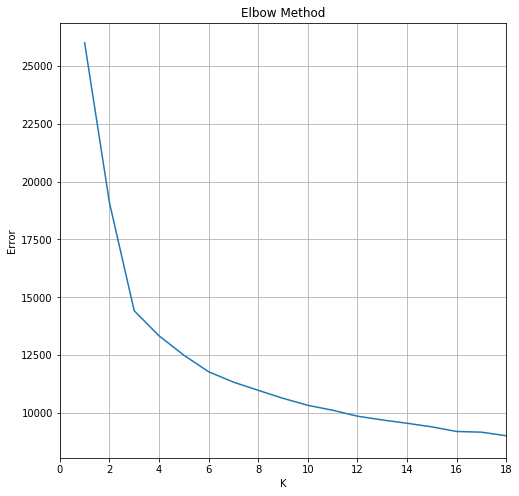

In [19]:
#Metodo de Elbow

from sklearn.cluster import  KMeans

Ks = np.arange(1, 20)
km = [KMeans(n_clusters=i, n_init=10, init='k-means++', max_iter=300, tol=1e-04, random_state=1997) for i in Ks]
score = [-km[i].fit(x).score(x) for i in range(len(km))]
Ks.dtype = int
plt.figure(figsize=(8,8))
plt.plot(Ks,score)
plt.xlim(0,18)
plt.grid(True)
plt.xlabel('K')
plt.ylabel('Error')
plt.title('Elbow Method')

Text(0.5, 0, 'K')

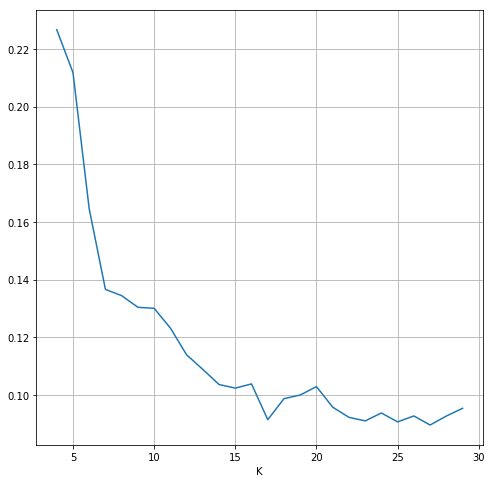

In [20]:
#Silhoutte Score para saber cuantos K utilizar

from sklearn.metrics import silhouette_score

Ks = np.arange(2, 30)
kms = [KMeans(n_clusters=i, n_init=10, init='k-means++', max_iter=300, tol=1e-04, random_state=1997).fit(x) for i in Ks]
s_scores = [silhouette_score(x,kms[i].labels_) for i in range(2,len(Ks))]
plt.figure(figsize=(8,8))
plt.plot(Ks[2:len(Ks)],s_scores)
#plt.xlim(0,18)
plt.grid(True)
plt.xlabel('K')

In [21]:
#Segun los resultados anteriores vamos a probar con 7 clusters :v

audio_cols = ['chroma_stft', 'rmse', 'spectral_centroid', 'spectral_bandwidth', 'rolloff', 'zero_crossing_rate', 'mfcc1' , 'mfcc2', 'mfcc3', 'mfcc4', 'mfcc5', 'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10', 'mfcc11', 'mfcc12', 'mfcc13', 'mfcc14', 'mfcc15', 'mfcc16', 'mfcc17', 'mfcc18', 'mfcc19', 'mfcc20']

km = KMeans(n_clusters=7, n_init=10, init='k-means++', max_iter=300, tol=1e-04, random_state=1997)
km.fit(x)
labels = km.labels_
cluster_centers = km.cluster_centers_
labels_unique = np.unique(labels)
n_clusters_ = 10
km_clusters = pd.DataFrame(cluster_centers, columns=audio_cols)
km_clusters['cluster'] = ['KM{}'.format(l) for l in labels_unique]
km_clusters['method'] = 'KMeans'
cols = ['cluster'] + audio_cols + ['method']
km_clusters = km_clusters[cols]

In [22]:
km_clusters

,cluster,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,method
0,KM0,-1.348503,-1.149153,-1.305169,-1.380245,-1.383329,-0.929230,-1.600903,1.348885,-0.154171,...,-0.761672,0.550979,-0.426862,0.706216,-0.084091,0.899684,-0.085893,0.711737,0.036844,KMeans
1,KM1,0.068700,0.082658,0.211074,0.564972,0.265016,-0.134493,0.174943,-0.377503,0.544018,...,-0.542246,0.777941,-0.548372,0.617501,-0.434866,0.274019,-0.435233,0.117143,-0.342368,KMeans
2,KM2,0.200498,0.006519,0.109933,-0.104724,0.099519,0.365128,0.449074,0.015837,-0.733705,...,0.813064,-1.294915,0.426315,-1.222480,0.495634,-1.088549,0.391375,-0.896579,0.068640,KMeans
3,KM3,0.581791,0.960994,1.454962,1.495991,1.491041,1.029699,0.848869,-1.308366,0.917457,...,-0.455327,0.792375,-0.254015,0.739798,-0.247751,0.761001,0.105721,0.674626,0.335937,KMeans
4,KM4,-0.176015,-0.271922,-0.736345,-0.582221,-0.643493,-0.792362,-0.394017,0.590203,-0.104847,...,0.485612,-0.105857,0.374990,-0.046958,0.158641,-0.129000,-0.002715,0.059935,-0.164829,KMeans
5,KM5,1.098785,0.423877,0.532524,0.126612,0.429897,0.821627,0.685680,-0.497769,-0.704010,...,1.307794,-0.737785,1.298303,-0.693634,1.149372,-0.399225,0.936724,-0.284221,0.873752,KMeans
6,KM6,-1.018939,-0.468113,-0.988627,-0.906403,-1.019630,-0.864158,-0.714136,0.963679,-0.041816,...,-1.219856,-0.371339,-1.251150,-0.480566,-1.526068,-0.690532,-1.390532,-0.753565,-1.281118,KMeans


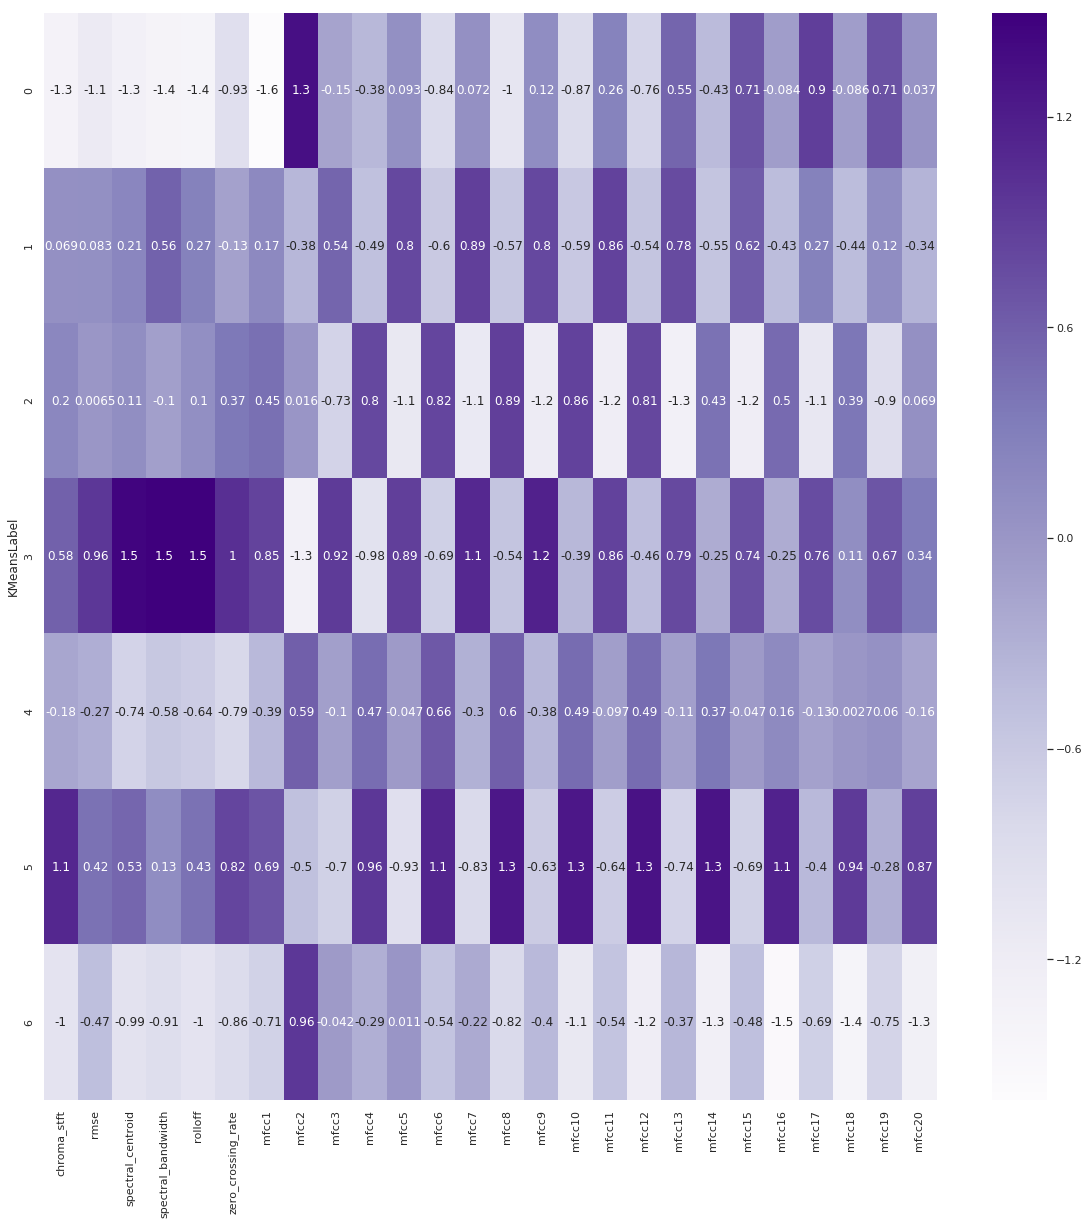

In [23]:
#Un mapa de calor de relacion entre cada cluster y las caracteristicas

import seaborn as sns

plt.figure(figsize=(20,20))
sns.set(font_scale=1)
sns.heatmap(
    data=km_clusters.loc[km_clusters.method=='KMeans', audio_cols],
    cmap='Purples',
    annot=True
)
plt.ylabel("KMeansLabel")
#plt.savefig('heatmap_all.png')

In [24]:
#Aplicar PCA para reducir la dimensionalidad a 2, esto para poder visualizar el resultado en una grafica

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_new = pca.fit_transform(x)
xx,yy = zip(*X_new)
datos['xx'] = xx
datos['yy'] = yy
components = pca.components_
explained_variance = pca.explained_variance_
explained_variance_ratio = pca.explained_variance_ratio_
singular_values = pca.singular_values_

In [25]:
audio_components = dict(list(zip(audio_cols, zip(*np.round(components,2)))))
audio_components

{'chroma_stft': (0.16, 0.26),
 'rmse': (0.06, 0.24),
 'spectral_centroid': (0.06, 0.36),
 'spectral_bandwidth': (-0.02, 0.36),
 'rolloff': (0.05, 0.36),
 'zero_crossing_rate': (0.12, 0.27),
 'mfcc1': (0.14, 0.27),
 'mfcc2': (-0.05, -0.35),
 'mfcc3': (-0.18, 0.13),
 'mfcc4': (0.24, -0.08),
 'mfcc5': (-0.25, 0.12),
 'mfcc6': (0.28, -0.01),
 'mfcc7': (-0.25, 0.18),
 'mfcc8': (0.29, 0.04),
 'mfcc9': (-0.22, 0.2),
 'mfcc10': (0.28, 0.06),
 'mfcc11': (-0.22, 0.16),
 'mfcc12': (0.28, 0.06),
 'mfcc13': (-0.25, 0.12),
 'mfcc14': (0.23, 0.08),
 'mfcc15': (-0.23, 0.1),
 'mfcc16': (0.2, 0.07),
 'mfcc17': (-0.19, 0.09),
 'mfcc18': (0.15, 0.1),
 'mfcc19': (-0.15, 0.09),
 'mfcc20': (0.09, 0.13)}

In [26]:
components

array([[ 0.15750582,  0.05561711,  0.0574533 , -0.0150956 ,  0.04592882,
         0.11974928,  0.13925357, -0.0502278 , -0.18185693,  0.23881511,
        -0.24722585,  0.27593969, -0.24765181,  0.29397243, -0.2242241 ,
         0.28413817, -0.22236792,  0.28003053, -0.24631895,  0.22855912,
        -0.22708602,  0.20040562, -0.1890193 ,  0.15377912, -0.15246124,
         0.09459368],
       [ 0.25704173,  0.24291229,  0.35592343,  0.35623335,  0.36023094,
         0.27204858,  0.27349239, -0.35069671,  0.13047871, -0.07739774,
         0.1182116 , -0.00944076,  0.17618804,  0.03518951,  0.20296479,
         0.06347919,  0.15938378,  0.06115316,  0.11547657,  0.07825034,
         0.09739517,  0.0707386 ,  0.08848425,  0.09888595,  0.0860358 ,
         0.13073916]])

In [27]:
singular_values

array([91.57307488, 81.50910381])

In [28]:
descriptive_labels = ['KM0','KM1','KM2','KM3','KM4','KM5','KM6','KM7','KM8','KM9']
unique_labels = np.unique(labels)
translated_labels = dict(zip(unique_labels, descriptive_labels))
datos['KMeansLabel'] = list(map(lambda x:translated_labels[x], labels))

/home/alopolisia/.local/lib/python3.6/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


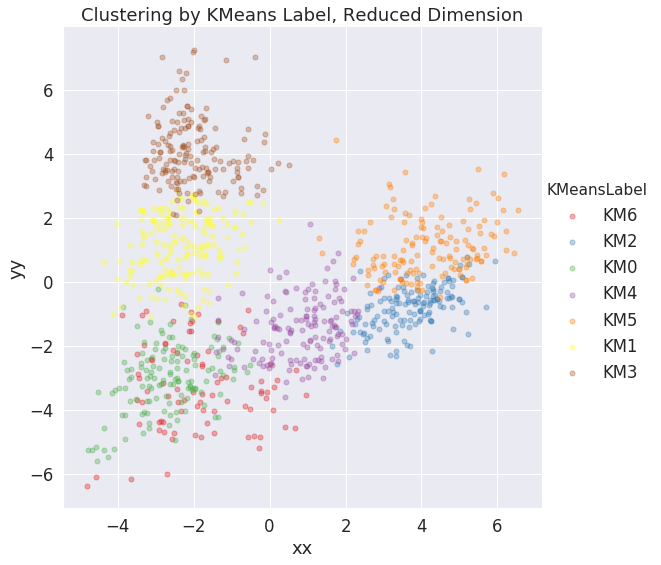

In [29]:
#Grafica de K mean con 7 clusters

sns.set(font_scale=1.5)

sns.lmplot(data=datos, x='xx', y='yy', hue='KMeansLabel', fit_reg=False, legend=True, size=8, palette='Set1',
           scatter_kws={'alpha':0.35, 's':25})
plt.title("Clustering by KMeans Label, Reduced Dimension")

plt.savefig('pca_scatter_KM.png')

In [30]:
# https://github.com/victoreram/Springboard-Data-Science/blob/master/GenreClustering/GenreClustering.ipynb

# Evaluar la calidad de la cantidad de closters

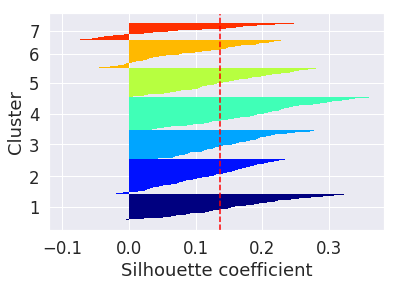

In [31]:
# plot of the silhouette coefficient for a k-means clustering with k=3
import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples


y_km = km.fit_predict(x)

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(x, y_km, metric='euclidean')

y_ax_lower, y_ax_upper = 0, 0
yticks = []

for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper),
            c_silhouette_vals,
            height=1.0,
            edgecolor='none',
            color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)

plt.axvline(silhouette_avg,
           color="red",
           linestyle='--')
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.show()

Como se alcanza a visualizar en la grafica enterior, el cluster 4 se podria decir que es el mejor. Sin embargo, todos tienen outlayers y el promedio de los clusters es de 0.13

# Clustering Jerarquico

In [34]:
# calculate the distance matrix
# Euclidean distance between each pair of sample points
from scipy.spatial.distance import pdist, squareform

copia = pd.DataFrame(cluster_centers, columns=audio_cols)
labels = ['KM{}'.format(l) for l in labels_unique]

row_dist = pd.DataFrame(squareform(pdist(copia, metric='euclidean')),
                       columns=labels, index=labels)
row_dist

,KM0,KM1,KM2,KM3,KM4,KM5,KM6
KM0,0.000000,4.815749,7.247195,7.395971,4.298865,8.058861,4.063947
KM1,4.815749,0.000000,6.437188,3.109539,4.318689,6.609931,4.896479
KM2,7.247195,6.437188,0.000000,7.545935,3.684300,2.610477,6.291559
KM3,7.395971,3.109539,7.545935,0.000000,6.452503,6.954179,7.600435
KM4,4.298865,4.318689,3.684300,6.452503,0.000000,4.370352,4.564411
KM5,8.058861,6.609931,2.610477,6.954179,4.370352,0.000000,8.018749
KM6,4.063947,4.896479,6.291559,7.600435,4.564411,8.018749,0.000000


In [38]:
from scipy.cluster.hierarchy import linkage

# Next, we will apply the complete linkage agglomeration to our clusters
row_clusters = linkage(copia.values,
                      method='complete',
                      metric='euclidean')

In [39]:
# To take a closer look at the clustering results, we can turn clustering results into a pandas DataFrame
pd.DataFrame(row_clusters,
            columns=['row label 1',
                    'row label 2',
                    'distance',
                    'no. of items in clust.'],
            index=['cluster %d' % (i+1) for i in range(row_clusters.shape[0])])

,row label 1,row label 2,distance,no. of items in clust.
cluster 1,2.0,5.0,2.610477,2.0
cluster 2,1.0,3.0,3.109539,2.0
cluster 3,0.0,6.0,4.063947,2.0
cluster 4,4.0,7.0,4.370352,3.0
cluster 5,8.0,10.0,7.545935,5.0
cluster 6,9.0,11.0,8.058861,7.0


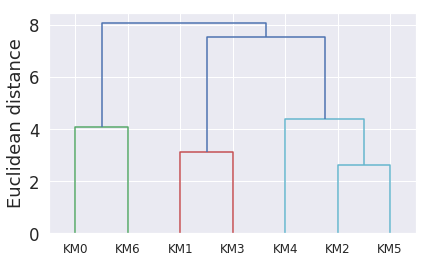

In [40]:
# making a dendrogram
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram
# make dendrogram black (pat 1/2)
# from scipy.cluster.hierarchy import set_link_color_palette
# set_link_color_palette(['black'])
row_dendr = dendrogram(row_clusters,
                      labels=labels,
                       # make dendrogram black (part 2/2)
                       # color_threshold=np.inf
                      )
plt.tight_layout()
plt.ylabel('Euclidean distance')
plt.show()

Al aplicar clustering jerarquico calculando la matriz de distancia entre cada cluster, se puede denotar que KM0 (Verde) y KM6 (Rojo) de la grafica de dispersión si son bastantes cercanos, y asi mismo con los clusters KM1 con KM3 y KM2 con KM5.